In [ ]:
[观看观看李宏毅课程内容：p9](https://www.bilibili.com/video/av35932863/?p=9)

[学习Datawhale整理笔记](https://datawhalechina.github.io/Leeml-Book/#/chapter9/chapter9)
# 学习导图
![](https://raw.githubusercontent.com/xumajie/datawhale/master/lihongyi-ML/task05/classification.png)

![](https://raw.githubusercontent.com/xumajie/datawhale/master/lihongyi-ML/task05/Logistic-Regression.png)

# (1)推导LR损失函数

Logistic 回归模型估计概率(向量形式)

$\hat{p}=h_{\theta}(x)=\sigma(x^T\theta)$

Logistic 函数

$\sigma(t)=\frac{1}{1+e^{-t}}$

## 代码实现： 

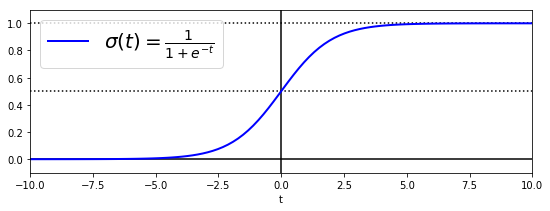

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# Logistic 函数 
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
# save_fig("logistic_function_plot")
plt.show()

# (2)学习LR梯度下降
## 函数集

$\hat{p}=wx+b$

$\hat{y}=\left\{\begin{matrix} 0;\hat{p}<0.5\\1;\hat{p}\geq0.5 \end{matrix}\right.$

合成

$y=p^{\hat{y}}(1-p)^{(1-\hat{y})}$

$p=wx_i+b$

$f_{w,b}(x)(x)=\sigma(p)=\frac{1}{1+e^{-p}}$

求导

$p'=f'_{w,b}(x)=(\frac{1}{1+e^{-p}})'(1+e^{-p})'(p)'=-\frac{1}{(1+e^{-p})^2}(-1)e^{-p}p'$

$=(\frac{1}{1+e^{-p}})'(1+e^{-p})'=-\frac{1}{(1+e^{-p})^2}(-1)e^{-p}$

$=\frac{1}{(1+e^{-p})}\frac{e^{-p}}{(1+e^{-p})}=\frac{1}{(1+e^{-p})}(1-\frac{1}{(1+e^{-p})}) =p(1-p)$


损失函数
- 平方误差

$L(f)=\frac{1}{2}\displaystyle\sum_{n}(f_{w,b}(x)(x^{n})-\hat{y}^{n}))^2$


- 交叉熵损失函数

$L(w)=\frac{1}{m}\displaystyle\sum_{i=1}^{n}y=\frac{1}{m}\displaystyle\sum_{i=1}^{n}p^{\hat{y}}(1-p)^{(1-\hat{y})}$

$J(w)=\log L(w)=\frac{1}{m} \log \displaystyle\sum_{i=1}^{n}p^{\hat{y}}(1-p)^{(1-\hat{y})}$

$=\frac{1}{m} \displaystyle\sum_{i=1}^{n}(y\log p+(1-y）\log (1-p))$

$=\frac{1}{m} \displaystyle\sum_{i=1}^{n}(y\log f_{w,b}(x)+(1-y）\log (1-f_{w,b}(x)))$

$\frac{J{w}}{\partial w}=\frac{J{w}}{\partial p}\frac{\partial p}{\partial w}=(y\frac{1}{p}-(1-y)\frac{1}{(1-p)})p'$

带入

$p'=p(1-p)$

得：

$J'(w)=\frac{J{w}}{\partial p}\frac{\partial p}{\partial w}==(y\frac{1}{p}-(1-y)\frac{1}{(1-p)})p(1-p)=\frac{1}{m}\displaystyle\sum_{m}(f_{w,b}(x)-y)x_i$

$w_i \underset{}{\leftarrow}w_i-\eta\displaystyle\sum_{m}-(y^n-f_{w,b}(x^n))x_i$

![](https://raw.githubusercontent.com/xumajie/datawhale/master/lihongyi-ML/task05/cross_entroy_gradient.png)
>如果是交叉熵，距离target越远，微分值就越大，就可以做到距离target越远，更新参数越快。而平方误差在距离target很远的时候，微分值非常小，会造成移动的速度非常慢，这就是很差的效果了。
## 交叉熵和平方误差对比

![](https://raw.githubusercontent.com/xumajie/datawhale/master/lihongyi-ML/task05/square_cross_entropy_compare.jpg)

>样本符合伯努利分布（0-1分布，两点分布）,所以使用交叉熵函数作为损失函数
# (3)利用代码描述梯度下降(选做)

>Logistic 回归模型、最大熵模型可归结为以似然函数为目标函数的最优化问题，通常通过迭代算法求解，它
是光滑的凸函数，因此多种最优化的方法都能适用。

- 常用方法：

 - 梯度下降法
 - 改进的迭代尺度法
 - Newton 法
 - 拟 Newton 法
 
- 梯度下降法
>梯度下降法是一种迭代算法.选取适当的初始值x(0)，不断迭代，更新x的值，进行目标函数的极小化，直到收敛。由于负梯度方向是使函数值下降最快的方向，在迭代的每一步，以负梯度方向更新x的值，从而达到减少函数值的目的。

## 代码实现

In [ ]:
from sklearn.linear_model import LogisticRegression
X_train,y_train,X_test,y_test=[]
clf = LogisticRegression(max_iter=200)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

x_ponits = np.arange(4, 8)
y_ = -(clf.coef_[0][0]*x_ponits + clf.intercept_)/clf.coef_[0][1]
plt.plot(x_ponits, y_)

plt.plot(X[:50, 0], X[:50, 1], 'bo', color='blue', label='0')
plt.plot(X[50:, 0], X[50:, 1], 'bo', color='orange', label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()


# (4)Softmax原理
Softmax 是 Logistic 回归在C个可能不同的值上的推广

$f(x)_c=\frac{e^{-x_c}}{\sum_{i=1}^{C-1}e^{-x_j}},c=0,...,C-1$

- 该函数的返回值为含C个分量的概率向量，每个分量对应于一个输出类别的概率；
- 由于各分量为概率，C个分量之和始终为1，这是因为softmax的公式要求每个样本必须属于某个输出类别，且所有可能的样本均被覆盖；
- 如果各分量之和小于1，则意味着存在一些隐藏的类别；
- 若各分量之和大于1，则说明每个样本可能同时属于多个类别；
- 换言之，当类别总数为2时，所得到的输出概率与 Logistic 回归模型的输出完全相同。

# (5)softmax损失函数
## 交叉熵损失函数
$loss_i=-\displaystyle\sum_{c}(y_c-\log(y-predict_c))$

将每个输出类别在样本的损失上相加。

### Note: 对于训练样本的期望类别，yc应当为1，对其他情形应为0，因此实际上这个和式中只有一个损失值被计入，它度量了模型为真实类别预测的概率的可信度!!!

- 为计算训练集上的总损失值，考虑将每个训练样本的损失相加

$loss=-\displaystyle\sum_{c}\displaystyle\sum_{c}(y_{ci} \cdot \log(y-predicted_{ci}))$

## (6)softmax梯度下降 代码实现

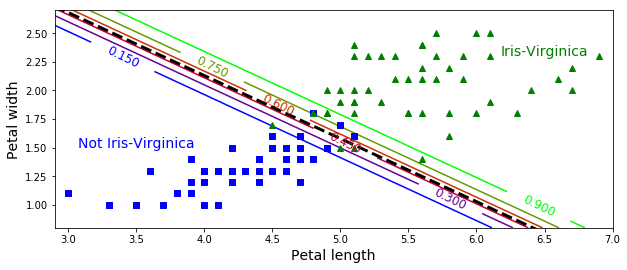

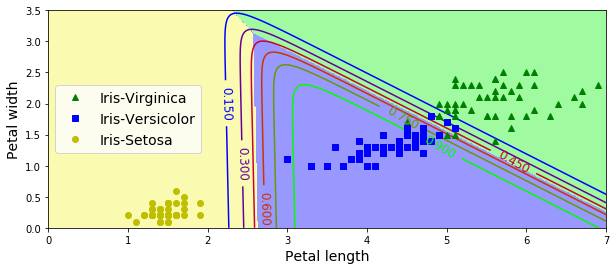

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
iris=load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
# save_fig("logistic_regression_contour_plot")
plt.show()

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )

X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
# save_fig("softmax_regression_contour_plot")
plt.show()

